In [84]:

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from imblearn.over_sampling import RandomOverSampler
import imblearn

ImportError: cannot import name '_joblib_parallel_args' from 'sklearn.utils.fixes' (D:\Anaconda\lib\site-packages\sklearn\utils\fixes.py)

In [85]:
mat_df= pd.read_csv("student-mat.csv", sep=";", header = 0, index_col=False,names=None)
por_df= pd.read_csv("student-por.csv", sep=";", header = 0, index_col=False,names=None)
frames=[mat_df,por_df]
df1=pd.concat(frames)

df1

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


Random forest regression

In [86]:
#seperating data

df= df1.select_dtypes(exclude=['object'])

X = df.drop('G3',axis=1)
y = df['G3'].astype(int)
#creating training testing and validating dataset.

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)





In [87]:
from sklearn.metrics import r2_score
#Build a Machine Learning Model RandomForest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,random_state=42)
rfModel = rf.fit(X_train, y_train)
y_pred_rf = rfModel.predict(X_test)

#Evaluating The Machine Learning Model
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

#Mean Squared Error
mse = mean_squared_error(y_test, y_pred_rf)
print('\nMean squared error :', round(mse, 2))

#Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred_rf)
print('Mean absolute error :', round(mae, 2))

#Root Mean Squared Error
rmse = np.sqrt(mse)
print('Root Mean Squared Error :', round(rmse, 2))
# checking accuracy
x=r2_score(y_test, y_pred_rf)
print("Accuracy :",round((x*100),2),"%")


Mean squared error : 3.0
Mean absolute error : 0.96
Root Mean Squared Error : 1.73
Accuracy : 80.62 %


In [88]:
dfA =pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_rf})
dfA

,Actual,Predicted
576,11,10.16
280,8,7.33
141,13,12.63
429,11,10.88
249,12,12.90
...,...,...
294,13,11.34
453,8,4.83
222,13,12.57
63,13,13.33


In [89]:
importance=rfModel.feature_importances_
columns=X_train.columns

rfGraph=pd.Series(importance,columns)
rfGraph


age           0.013236
Medu          0.007445
Fedu          0.005695
traveltime    0.004392
studytime     0.014231
failures      0.004617
famrel        0.005213
freetime      0.008212
goout         0.013086
Dalc          0.004004
Walc          0.006443
health        0.010130
absences      0.061285
G1            0.014601
G2            0.827412
dtype: float64

Text(0.5, 1.0, 'random forest regressor visualization')

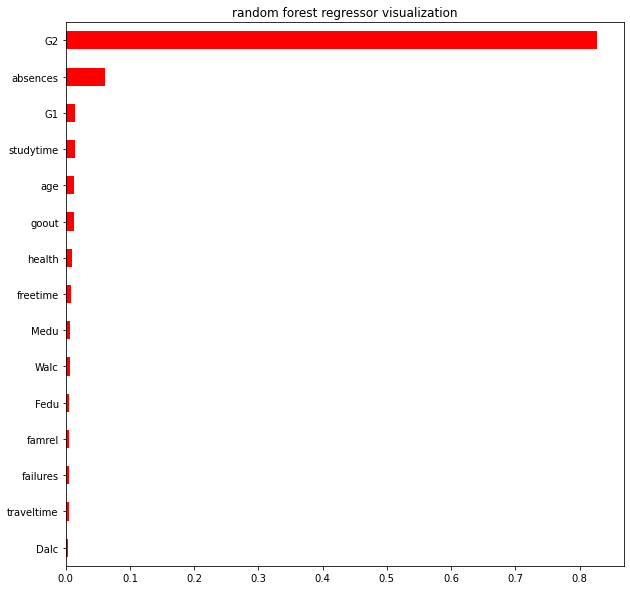

In [90]:
figure(figsize=(10,10))

rfGraph.sort_values().plot.barh(color="red")
plt.title("random forest regressor visualization")

In [91]:
buckets = [0,7, 14,20]
buckets_name = [0, 1, 2]

df1["cat"]=pd.cut(df1['G3'], buckets , labels = buckets_name,include_lowest=True)

df1.dtypes

school          object
sex             object
age              int64
address         object
famsize         object
Pstatus         object
Medu             int64
Fedu             int64
Mjob            object
Fjob            object
reason          object
guardian        object
traveltime       int64
studytime        int64
failures         int64
schoolsup       object
famsup          object
paid            object
activities      object
nursery         object
higher          object
internet        object
romantic        object
famrel           int64
freetime         int64
goout            int64
Dalc             int64
Walc             int64
health           int64
absences         int64
G1               int64
G2               int64
G3               int64
cat           category
dtype: object

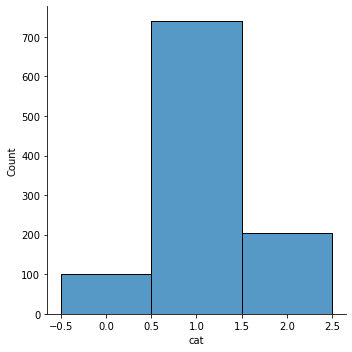

In [92]:
sns.displot(df1['cat'])

In [93]:
medium_count,high_count,low_count= df1["cat"].value_counts()

low = df1[df1['cat'] == 0]
medium = df1[df1['cat'] == 1]
high = df1[df1['cat'] == 2]
print("low :",low.shape)
print("medium :",medium.shape)
print("high :",high.shape)


low : (100, 34)
medium : (740, 34)
high : (204, 34)


0    740
1    740
2    740
Name: cat, dtype: int64


age              int64
Medu             int64
Fedu             int64
traveltime       int64
studytime        int64
failures         int64
famrel           int64
freetime         int64
goout            int64
Dalc             int64
Walc             int64
health           int64
absences         int64
G1               int64
G2               int64
G3               int64
cat           category
dtype: object

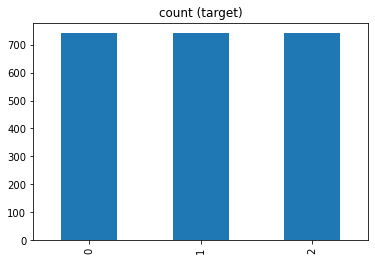

In [94]:
low_over = low.sample(medium_count, replace=True)
high_over=high.sample(medium_count, replace=True)
test_over_sampling = pd.concat([low_over, medium,high_over], axis=0)

print(test_over_sampling['cat'].value_counts())# plot the count after under-sampeling

#test_over_sampling is a new dataframe generated by over sampling technique. This needs to be split into test and train dataset later on.
test_over_sampling['cat'].value_counts().plot(kind='bar', title='count (target)')

test_over_sampling= test_over_sampling.select_dtypes(exclude=['object'])
test_over_sampling.dtypes

solving class imbalance problem using SMOTE


In [95]:
X = df1.drop('cat',axis=1)
y = df1['cat'].astype(int)
y.value_counts()

1    740
2    204
0    100
Name: cat, dtype: int64

In [96]:


ros = RandomOverSampler(random_state=42)

# fit predictor and target variable
#X_ros and y_ros is the new feature and target dataframe generated by SMOTE technique.
X_ros, y_ros = ros.fit_resample(X, y)

#Here two dataframe hasbeen concatinated so that they can be splitted later.
smote_df=pd.concat([X_ros, y_ros], axis=1)


#excluded strings to make it easier for svm.
smote_df= smote_df.select_dtypes(exclude=['object'])

smote_df


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,cat
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10,1
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15,2
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215,17,2,4,1,2,0,4,3,2,1,1,5,8,14,15,16,2
2216,16,2,2,3,1,0,4,3,2,1,1,4,0,14,14,16,2
2217,16,1,0,2,2,0,4,3,2,1,1,3,2,13,15,16,2
2218,16,2,2,3,1,0,4,3,2,1,1,4,0,14,14,16,2


creating SVM

In [97]:
#here df generated by SMOTE technique is being splitted to run the svm model.
X = smote_df.drop(['cat','G3'],axis=1)
y = smote_df['cat'].astype(int)

#splitting dataset to train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(model.score(X_test,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


0.9256756756756757
[[133   2   0]
 [ 19 121   6]
 [  0   6 157]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       135
           1       0.94      0.83      0.88       146
           2       0.96      0.96      0.96       163

    accuracy                           0.93       444
   macro avg       0.93      0.93      0.92       444
weighted avg       0.93      0.93      0.92       444



In [98]:
#here df generated by RandomOverSampler technique is being splitted to run the svm model.
X = test_over_sampling.drop(['cat','G3'],axis=1)
y = test_over_sampling['cat'].astype(int)

#splitting dataset to train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(model.score(X_test,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


0.9279279279279279
[[155   2   0]
 [ 16  91  13]
 [  0   1 166]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       157
           1       0.97      0.76      0.85       120
           2       0.93      0.99      0.96       167

    accuracy                           0.93       444
   macro avg       0.93      0.91      0.92       444
weighted avg       0.93      0.93      0.92       444



Random forest classifier


In [99]:
##here df generated by SMOTE technique is being splitted to run the RandomForestClassifier model.
X = smote_df.drop(['G3','cat'],axis=1)
y = smote_df['cat'].astype(int)

#splitting dataset to train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(model.score(X_test,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9684684684684685
[[135   0   0]
 [ 11 133   2]
 [  0   1 162]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       135
           1       0.99      0.91      0.95       146
           2       0.99      0.99      0.99       163

    accuracy                           0.97       444
   macro avg       0.97      0.97      0.97       444
weighted avg       0.97      0.97      0.97       444



In [100]:
#here df generated by RandomOverSampler technique is being splitted to run the RandomForestClassifier model.
X = test_over_sampling.drop(['G3','cat'],axis=1)
y = test_over_sampling['cat'].astype(int)

#splitting dataset to train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=RandomForestClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)
y_pred = model.predict(X_test)
print(model.score(X_test,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9707207207207207
[[157   0   0]
 [  6 107   7]
 [  0   0 167]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       157
           1       1.00      0.89      0.94       120
           2       0.96      1.00      0.98       167

    accuracy                           0.97       444
   macro avg       0.97      0.96      0.97       444
weighted avg       0.97      0.97      0.97       444



creating MLP

In [101]:
X = smote_df.drop(['G3','cat'],axis=1)
y = smote_df['cat'].astype(int)

#splitting dataset to train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

mlp=MLPClassifier(max_iter=500,activation='relu')
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)

print(mlp.score(X_test,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(mlp.score(X_test,y_test))


0.9346846846846847
[[135   0   0]
 [ 17 125   4]
 [  0   8 155]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       135
           1       0.94      0.86      0.90       146
           2       0.97      0.95      0.96       163

    accuracy                           0.93       444
   macro avg       0.93      0.94      0.93       444
weighted avg       0.94      0.93      0.93       444

0.9346846846846847


D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [102]:
X = test_over_sampling.drop(['G3','cat'],axis=1)
y = test_over_sampling['cat'].astype(int)

#splitting dataset to train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

mlp=MLPClassifier(max_iter=500,activation='relu')
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)

print(mlp.score(X_test,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(mlp.score(X_test,y_test))

0.9301801801801802
[[157   0   0]
 [ 13  94  13]
 [  0   5 162]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       157
           1       0.95      0.78      0.86       120
           2       0.93      0.97      0.95       167

    accuracy                           0.93       444
   macro avg       0.93      0.92      0.92       444
weighted avg       0.93      0.93      0.93       444

0.9301801801801802
